## Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline

pd.set_option('display.max_rows',500)

In [2]:
df = pd.read_csv("fut_ratings_clean_rating.csv")
df.head(15)

,Event,Date,Pack Type,trsh/door/brd/WO,Top Rating
0,1.0,10/29,Premium Gold Pack,door,80.0
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Event', 'Date', 'Pack Type', 'trsh/door/brd/WO', 'Top Rating'], dtype='object')

## Clean Data - 'Event'

In [4]:
df['Event'].unique()

# Double check that 'Event' column is only numerical values 1-110 (AKA the # of events in data, which is 110)

array([  1.,  nan,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110.])

In [5]:
df['trsh/door/brd/WO'].unique()

# Check if 'trsh/door/brd/WO' column has any typos. Should only be 4 values.
# This column should display "trash, door, board, WO". If values don't match up, change via Find and Replace
# Change after dropping blank rows

array(['door', nan, 'doors', 'trash', 'Board', 'board', 'boards',
       'walkout', 'WO', 'Walkout', 'boad'], dtype=object)

## Clean Data - Drop Blank Rows

In [6]:
df.dropna()

,Event,Date,Pack Type,trsh/door/brd/WO,Top Rating
0,1.0,10/29,Premium Gold Pack,door,80.0
13,1.0,10/29,Premium Gold Pack,doors,80.0
26,1.0,10/29,Premium Gold Pack,doors,79.0
39,1.0,10/29,Premium Gold Pack,doors,78.0
52,1.0,10/29,Premium Gold Pack,doors,78.0
...,...,...,...,...,...
16875,110.0,8/7,Premium Gold Players Pack,board,83.0
16888,110.0,8/7,Gold Pack,doors,78.0
16901,110.0,8/7,Gold Pack,doors,82.0
16914,110.0,8/7,Gold Pack,trash,79.0


In [7]:
# newdf with blank rows dropped
data = df.dropna()

In [8]:
data.reset_index(drop=True, inplace=True)

## Clean Data - 'trsh/door/brd/WO'

In [9]:
data['trsh/door/brd/WO'].unique()

array(['door', 'doors', 'trash', 'Board', 'board', 'boards', 'walkout',
       'WO', 'Walkout', 'boad'], dtype=object)

In [10]:
# Change to "trash, door, board, WO" by find and replace.

data.replace('doors','door',inplace = True)
data.replace('Board','board',inplace = True)
data.replace('boards','board',inplace = True)
data.replace('boad','board',inplace = True)
data.replace('walkout','WO',inplace = True)
data.replace('Walkout','WO',inplace = True)
data.head(30)

/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Event,Date,Pack Type,trsh/door/brd/WO,Top Rating
0,1.0,10/29,Premium Gold Pack,door,80.0
1,1.0,10/29,Premium Gold Pack,door,80.0
2,1.0,10/29,Premium Gold Pack,door,79.0
3,1.0,10/29,Premium Gold Pack,door,78.0
4,1.0,10/29,Premium Gold Pack,door,78.0
5,1.0,10/29,Premium Gold Pack,door,81.0
6,1.0,10/29,Premium Gold Pack,trash,79.0
7,1.0,10/29,Premium Gold Pack,door,79.0
8,1.0,10/29,Premium Gold Pack,door,80.0
9,1.0,10/29,Premium Gold Pack,door,81.0


## Clean Data - 'Pack Types'

In [11]:
data['Pack Type'].unique()

array(['Premium Gold Pack', 'Jumbo Gold Pack', 'Jumbo Premium Gold Pack',
       'Premium Gold Players Pack', 'Mega Pack', 'Electrum Players Pack',
       'Premium Electrum Players Pack', 'Prime Electrum Players Pack',
       'Rare Electrum Players Pack', 'Rare Mixed Players Pack Pack',
       'Rare Mixed Players Pack', 'gold pack', 'small gold players pack',
       'mixed players pack', 'rare gold pack',
       'Jumbo premoium gold players', 'Rare mixed players pack',
       'Prime Gold Players Pack', 'Prime Mixed Players Pack',
       'Small Rare Gold Players Pack', 'Two Players Pack',
       'Small Electrum Players Pack', 'Small Prime Mixed Players Pack',
       'Small Rare Mixed Players Pack', 'Two player pack',
       'Rare Gold Pack', 'Small Gold Players Pack',
       'Small Prime Gold Players Pack', 'Prime Silver Players Pack',
       'Mixed Players Pack', 'Premium Mixed Players Pack',
       'Two Rare Gold Players Pack', 'Jumbo Premium Gold Players',
       'Rare Players Pack',

In [12]:
# We see duplicate pack types from: misspellings, upper/lower case issues, spacing issues
# So we change the duplicates/problem packs to one common name for each different pack types

In [13]:
data.replace('Small Prime Electrum Players Pack','small prime electrum players pack',inplace=True)
data.replace('Small Prime Electurm Players Pack','small prime electrum players pack',inplace=True)
data.replace('Jumbo Premium Gold Players Pack','jumbo premium gold players pack',inplace=True)
data.replace('Small Prime Mixed Players Pack','small prime mixed players pack',inplace=True)
data.replace('Small Prime Gold Players pack','small prime gold players pack',inplace=True)
data.replace('Jumbo Premium Gold Players','jumbo premium gold players pack',inplace=True)
data.replace('Jumbo premoium gold players','jumbo premium gold players pack',inplace=True)
data.replace('Jumbo Rare Gold Players Pack','jumbo rare gold players pack',inplace=True)
data.replace('Small Prime Gold Player Pack','small prime gold players pack',inplace=True)
data.replace('Small Prime Gold Player Pack','small prime gold players pack',inplace=True)
data.replace('Small Rare Gold Players Pack','small rare gold players pack',inplace=True)
data.replace('Small Rare gold players pack','small rare gold players pack',inplace=True)
data.replace('Small Rare Mixed Players Pack','small rare mixed players pack',inplace=True)
data.replace('Small Rare mixed Players Pack','small rare mixed players pack',inplace=True)
data.replace('Premium Electrum Players Pack','premium electrum players pack',inplace=True)
data.replace('Gold Premium Players Pack','premium gold players pack',inplace=True)
data.replace('Jumbo Premium Gold 26 Pack','jumbo premium gold 26 pack',inplace=True)
data.replace('Jumbo Premium Gold Pack','jumbo premium gold pack',inplace=True)
data.replace('Jumbo Rare Player Pack','jumbo rare players pack',inplace=True)
data.replace('Jumbo Rare Players Pack','jumbo rare players pack',inplace=True)
data.replace('One Rare Player Pack','one rare player pack',inplace=True)
data.replace('PL Premium Players Pack','pl premium players pack',inplace=True)
data.replace('Premium Gold Jumbo Pack','jumbo premium gold pack',inplace=True)
data.replace('Premium Gold Players Pack','premium gold players pack',inplace=True)
data.replace('Premium Jumbo Gold 26 Pack','jumbo premium gold 26 pack',inplace=True)
data.replace('Premium Jumbo Gold Pack','jumbo premium gold pack',inplace=True)
data.replace('Premium Mixed Players Pack','premium mixed players pack',inplace=True)
data.replace('Prime Electrum Players Pack','prime electrum players pack',inplace=True)
data.replace('Prime electrum players pack','prime electrum players pack',inplace=True)
data.replace('Prime Gold Players Pack','prime gold players pack',inplace=True)
data.replace('Prime Mixed Players Pack','prime mixed players pack',inplace=True)
data.replace('Prime Silver Players Pack','prime silver players pack',inplace=True)
data.replace('Rare Electrum Players Pack','rare electrum players pack',inplace=True)
data.replace('Rare Mixed Players Pack','rare mixed players pack',inplace=True)
data.replace('Rare mixed players pack','rare mixed players pack',inplace=True)
data.replace('Rare Mixed Players Pack Pack','rare mixed players pack',inplace=True)
data.replace('Small Gold Players Pack','small gold players pack',inplace=True)
data.replace('Small Gold Players pack','small gold players pack',inplace=True)
data.replace('Two Rare Gold Player Pack','two rare gold players pack',inplace=True)
data.replace('Two Rare Gold Players Pack','two rare gold players pack',inplace=True)
data.replace('Two UCL Common Player Pack','two ucl common players pack',inplace=True)
data.replace('UCL Rare Player Pack','ucl rare player pack',inplace=True)
data.replace('UCL Three Player Pack','ucl three player pack',inplace=True)
data.replace('Electrum Players Pack','electrum players pack',inplace=True)
data.replace('Mixed Players Pack','mixed players pack',inplace=True)
data.replace('Rare Players Pack','rare players pack',inplace=True)
data.replace('Jumbo Gold Pack','jumbo gold pack',inplace=True)
data.replace('Rare Gold Pack','rare gold pack',inplace=True)
data.replace('Rare Mega Pack','rare mega pack',inplace=True)
data.replace('Rare Mega Pack ','rare mega pack',inplace=True)
data.replace('Ultimate Pack','ultimate pack',inplace=True)
data.replace('Two player pack','two players pack',inplace=True)
data.replace('Two Player Pack','two players pack',inplace=True)
data.replace('Two Players Pack','two players pack',inplace=True)
data.replace('Gold 13 Pack','gold 13 pack',inplace=True)
data.replace('Gold 26 Pack','gold 26 pack',inplace=True)
data.replace('Gold Players Pack','gold players pack',inplace=True)
data.replace('Premium Gold Pack','premium gold pack',inplace=True)
data.replace('Mega Pack','mega pack',inplace=True)
data.replace('Gold Pack','gold pack',inplace=True)

data.head(300)

/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Event,Date,Pack Type,trsh/door/brd/WO,Top Rating
0,1.0,10/29,premium gold pack,door,80.0
1,1.0,10/29,premium gold pack,door,80.0
2,1.0,10/29,premium gold pack,door,79.0
3,1.0,10/29,premium gold pack,door,78.0
4,1.0,10/29,premium gold pack,door,78.0
5,1.0,10/29,premium gold pack,door,81.0
6,1.0,10/29,premium gold pack,trash,79.0
7,1.0,10/29,premium gold pack,door,79.0
8,1.0,10/29,premium gold pack,door,80.0
9,1.0,10/29,premium gold pack,door,81.0


In [14]:
data['Pack Type'].unique()

array(['premium gold pack', 'jumbo gold pack', 'jumbo premium gold pack',
       'premium gold players pack', 'mega pack', 'electrum players pack',
       'premium electrum players pack', 'prime electrum players pack',
       'rare electrum players pack', 'rare mixed players pack',
       'gold pack', 'small gold players pack', 'mixed players pack',
       'rare gold pack', 'jumbo premium gold players pack',
       'prime gold players pack', 'prime mixed players pack',
       'small rare gold players pack', 'two players pack',
       'Small Electrum Players Pack', 'small prime mixed players pack',
       'small rare mixed players pack', 'Small Prime Gold Players Pack',
       'prime silver players pack', 'premium mixed players pack',
       'two rare gold players pack', 'rare players pack',
       'ucl three player pack', 'small prime electrum players pack',
       'jumbo premium gold 26 pack', 'rare mega pack',
       'jumbo rare players pack', 'two ucl common players pack',
       'g

In [15]:
data.drop(columns=['Event','trsh/door/brd/WO','Date'],inplace=True)

# Drop columns, left code for find and replace as reference for later anaylsis. 

/Users/bryanjamieson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 2 columns):
Pack Type     1108 non-null object
Top Rating    1108 non-null float64
dtypes: float64(1), object(1)
memory usage: 17.4+ KB


In [17]:
grouped = data.groupby(['Pack Type'])
grouped.head()

,Pack Type,Top Rating
0,premium gold pack,80.0
1,premium gold pack,80.0
2,premium gold pack,79.0
3,premium gold pack,78.0
4,premium gold pack,78.0
25,jumbo gold pack,77.0
26,jumbo premium gold pack,81.0
27,premium gold players pack,84.0
28,premium gold players pack,82.0
29,premium gold players pack,82.0


In [18]:
for pack, group in grouped:
    print('Pack Type')
    print(group)
    print()

Pack Type
                       Pack Type  Top Rating
76   Small Electrum Players Pack        75.0
263  Small Electrum Players Pack        76.0
819  Small Electrum Players Pack        76.0
849  Small Electrum Players Pack        78.0
873  Small Electrum Players Pack        76.0

Pack Type
                          Pack Type  Top Rating
93    Small Prime Gold Players Pack        81.0
111   Small Prime Gold Players Pack        83.0
237   Small Prime Gold Players Pack        84.0
247   Small Prime Gold Players Pack        80.0
279   Small Prime Gold Players Pack        83.0
280   Small Prime Gold Players Pack        80.0
384   Small Prime Gold Players Pack        81.0
385   Small Prime Gold Players Pack        82.0
386   Small Prime Gold Players Pack        82.0
408   Small Prime Gold Players Pack        79.0
424   Small Prime Gold Players Pack        83.0
425   Small Prime Gold Players Pack        84.0
426   Small Prime Gold Players Pack        79.0
470   Small Prime Gold Players Pack  

In [19]:
print(grouped.groups)

# Verify values + index are the same using eye test

{'Small Electrum Players Pack': Int64Index([76, 263, 819, 849, 873], dtype='int64'), 'Small Prime Gold Players Pack': Int64Index([  93,  111,  237,  247,  279,  280,  384,  385,  386,  408,  424,
             425,  426,  470,  471,  533,  534,  535,  545,  636,  647,  743,
             792,  835,  836,  877,  903,  904,  966, 1000, 1053],
           dtype='int64'), 'electrum players pack': Int64Index([ 33,  94, 112, 241, 284, 392, 432, 539, 540, 541, 637, 803, 804,
            839, 840, 872, 875, 880, 926, 943],
           dtype='int64'), 'gold 13 pack': Int64Index([725, 1082], dtype='int64'), 'gold 26 pack': Int64Index([996], dtype='int64'), 'gold pack': Int64Index([  52,  167,  168,  230,  265,  554,  608,  609,  610,  611,
            ...
            1087, 1088, 1089, 1090, 1091, 1097, 1098, 1104, 1105, 1106],
           dtype='int64', length=103), 'gold players pack': Int64Index([ 297,  351,  382,  523,  627,  643,  644,  668,  669,  682,  737,
             856,  919,  964,  972, 1

In [20]:
print(len(grouped.groups))

41


In [21]:
# need avg top rating by probability

In [22]:
grouped.mean()

,Top Rating
Pack Type,
Small Electrum Players Pack,76.200000
Small Prime Gold Players Pack,81.935484
electrum players pack,79.500000
gold 13 pack,79.000000
gold 26 pack,85.000000
gold pack,78.572816
gold players pack,80.176471
jumbo gold pack,79.619048
jumbo premium gold 26 pack,81.200000


In [23]:
print(data['Pack Type'].nunique())

41


In [24]:
data['Pack Type'].value_counts()

rare players pack                    103
gold pack                            103
premium gold players pack             93
mega pack                             93
jumbo premium gold pack               63
premium gold pack                     61
rare electrum players pack            55
prime gold players pack               48
premium electrum players pack         45
rare gold pack                        43
prime electrum players pack           42
rare mixed players pack               38
Small Prime Gold Players Pack         31
small gold players pack               29
small prime electrum players pack     25
premium mixed players pack            24
jumbo gold pack                       21
small rare mixed players pack         21
electrum players pack                 20
gold players pack                     17
prime mixed players pack              17
mixed players pack                    15
rare mega pack                        15
small rare gold players pack          14
jumbo premium go

In [25]:
grouped.describe()

Top Rating                             \
                                       count       mean       std   min   
Pack Type                                                                 
Small Electrum Players Pack              5.0  76.200000  1.095445  75.0   
Small Prime Gold Players Pack           31.0  81.935484  1.860743  79.0   
electrum players pack                   20.0  79.500000  2.724161  75.0   
gold 13 pack                             2.0  79.000000  4.242641  76.0   
gold 26 pack                             1.0  85.000000       NaN  85.0   
gold pack                              103.0  78.572816  1.993135  75.0   
gold players pack                       17.0  80.176471  1.550617  78.0   
jumbo gold pack                         21.0  79.619048  1.430950  77.0   
jumbo premium gold 26 pack               5.0  81.200000  2.489980  79.0   
jumbo premium gold pack                 63.0  80.841270  2.597805  76.0   
jumbo premium gold players pack         13.0  82.923077  0.759555  82.0   
jumbo rare gold players pack             1.0  85.000000       NaN  85.0   
jumbo rare players pack                  9.0  85.222222  3.492054  82.0   
mega pack                               93.0  82.946237  1.985631  78.0   
mixed players pack                      15.0  78.866667  1.355764  76.0   
one rare player pack                     1.0  78.000000       NaN  78.0   
pl premium players pack                  1.0  84.000000       NaN  84.0   
premium electrum players pack           45.0  81.200000  2.389370  76.0   
premium gold pack                       61.0  79.868852  2.906747  76.0   
premium gold players pack               93.0  81.860215  2.159868  78.0   
premium mixed players pack              24.0  80.541667  2.021174  76.0   
prime electrum players pack             42.0  81.761905  2.150548  78.0   
prime gold players pack                 48.0  82.750000  2.047313  80.0   
prime mixed players pack                17.0  82.352941  2.596661  78.0   
prime silver players pack                1.0  74.000000       NaN  74.0   
rare electrum players pack              55.0  83.000000  2.501851  79.0   
rare gold pack                          43.0  82.279070  2.788801  78.0   
rare mega pack                          15.0  83.266667  2.051712  81.0   
rare mixed players pack                 38.0  81.868421  2.055593  78.0   
rare players pack                      103.0  84.174757  2.097745  81.0   
small gold players pack                 29.0  80.448276  2.114342  77.0   
small prime electrum players pack       25.0  79.880000  2.204541  75.0   
small prime gold players pack            4.0  81.000000  2.160247  78.0   
small prime mixed players pack           4.0  78.250000  2.629956  76.0   
small rare gold players pack            14.0  82.785714  1.368805  80.0   
small rare mixed players pack           21.0  80.857143  2.535463  77.0   
two players pack                         8.0  78.250000  2.815772  75.0   
two rare gold players pack              13.0  80.384615  1.757767  78.0   
two ucl common players pack              1.0  80.000000       NaN  80.0   
ucl three player pack                    1.0  79.000000       NaN  79.0   
ultimate pack                            2.0  87.000000  1.414214  86.0   

                                                             
                                     25%   50%    75%   max  
Pack Type                                                    
Small Electrum Players Pack        76.00  76.0  76.00  78.0  
Small Prime Gold Players Pack      81.00  82.0  83.00  87.0  
electrum players pack              78.00  79.5  80.00  88.0  
gold 13 pack                       77.50  79.0  80.50  82.0  
gold 26 pack                       85.00  85.0  85.00  85.0  
gold pack                          77.00  78.0  80.00  85.0  
gold players pack                  79.00  80.0  81.00  84.0  
jumbo gold pack                    79.00  80.0  80.00  83.0  
jumbo premium gold 26 pack         79.00  81.0  82.

In [26]:
# Drop pack if under 10 entries
# small electrum players pack, gold 13 pack, gold 26 pack, jumbo premium gold 26 pack, jumbo rare gold players pack,
# one rare player pack, pl premium players pack, prime silver players pack, small prime gold players pack
# small prime mixed players pack, two players pack, two ucl common players pack, ucl three player pack, ultimate pack

In [27]:
# data.loc[76,'Top Rating']

#this proves there is a top rating value for small electrum players pack, but nothing shows up"

### Finding True Pack Probabilities

## Packs to investigate:
##### 1: gold pack
##### 2: premium gold pack
##### 3: premium gold players pack
##### 4: jumbo premium gold pack
##### 5: prime gold players pack
##### 6: rare gold pack
##### 7: mega pack
##### 8: rare players pack
##### 9: premium electrum players pack

## 1: Gold Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 7.70%
#### Gold 84+ : 3.40%

In [28]:
gold_pack_75 = data.loc[((data['Pack Type'] == 'gold pack') & (data['Top Rating'] >= 75))]

In [29]:
gold_pack_82 = data.loc[((data['Pack Type'] == 'gold pack') & (data['Top Rating'] >= 82))]

In [30]:
gold_pack_84 = data.loc[((data['Pack Type'] == 'gold pack') & (data['Top Rating'] >= 84))]

In [31]:
print(f'75+ Count : {len(gold_pack_75)}')
print(f'82+ Count : {len(gold_pack_82)}')
print(f'84+ Count : {len(gold_pack_84)}')

75+ Count : 103
82+ Count : 13
84+ Count : 1


In [32]:
print(gold_pack_82)

#weird that I never got an 83

      Pack Type  Top Rating
167   gold pack        82.0
265   gold pack        82.0
704   gold pack        82.0
769   gold pack        82.0
777   gold pack        82.0
848   gold pack        82.0
988   gold pack        82.0
1007  gold pack        82.0
1013  gold pack        85.0
1028  gold pack        82.0
1034  gold pack        82.0
1035  gold pack        82.0
1105  gold pack        82.0


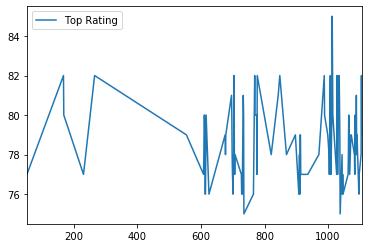

In [33]:
gold_pack_75.plot()

## 2: Premium Gold Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 19.00%
#### Gold 84+ : 4.70%

In [34]:
premium_gold_pack_75 = data.loc[((data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 75))]
premium_gold_pack_82 = data.loc[((data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 82))]
premium_gold_pack_84 = data.loc[((data['Pack Type'] == 'premium gold pack') & (data['Top Rating'] >= 84))]

In [35]:
print(f'75+ Count : {len(premium_gold_pack_75)}')
print(f'82+ Count : {len(premium_gold_pack_82)}')
print(f'84+ Count : {len(premium_gold_pack_84)}')

75+ Count : 61
82+ Count : 13
84+ Count : 5


In [36]:
print(premium_gold_pack_82)

              Pack Type  Top Rating
14    premium gold pack        82.0
18    premium gold pack        84.0
22    premium gold pack        83.0
24    premium gold pack        82.0
674   premium gold pack        83.0
710   premium gold pack        82.0
783   premium gold pack        84.0
823   premium gold pack        82.0
917   premium gold pack        84.0
978   premium gold pack        82.0
1005  premium gold pack        86.0
1006  premium gold pack        94.0
1010  premium gold pack        82.0


## 3: Premium Gold Players Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 59.00%
#### Gold 86+ : 3.60%

In [37]:
premium_gold__players_pack_75 = data.loc[((data['Pack Type'] == 'premium gold players pack') & (data['Top Rating'] >= 75))]
premium_gold__players_pack_82 = data.loc[((data['Pack Type'] == 'premium gold players pack') & (data['Top Rating'] >= 82))]
premium_gold__players_pack_86 = data.loc[((data['Pack Type'] == 'premium gold players pack') & (data['Top Rating'] >= 86))]

In [38]:
print(f'75+ Count : {len(premium_gold__players_pack_75)}')
print(f'82+ Count : {len(premium_gold__players_pack_82)}')
print(f'86+ Count : {len(premium_gold__players_pack_86)}')

75+ Count : 93
82+ Count : 50
86+ Count : 6


In [39]:
print(premium_gold__players_pack_82)

                      Pack Type  Top Rating
27    premium gold players pack        84.0
28    premium gold players pack        82.0
29    premium gold players pack        82.0
45    premium gold players pack        82.0
48    premium gold players pack        86.0
49    premium gold players pack        83.0
50    premium gold players pack        84.0
62    premium gold players pack        84.0
78    premium gold players pack        82.0
121   premium gold players pack        88.0
122   premium gold players pack        82.0
123   premium gold players pack        85.0
125   premium gold players pack        88.0
126   premium gold players pack        83.0
127   premium gold players pack        84.0
128   premium gold players pack        84.0
147   premium gold players pack        82.0
148   premium gold players pack        82.0
149   premium gold players pack        86.0
152   premium gold players pack        82.0
153   premium gold players pack        83.0
154   premium gold players pack 

## 4: Jumbo Premium Gold Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 42.00%
#### Gold 85+ : 4.60%

In [40]:
jumbo_premium_gold_pack_75 = data.loc[((data['Pack Type'] == 'jumbo_premium_gold_pack') & (data['Top Rating'] >= 75))]
jumbo_premium_gold_pack_82 = data.loc[((data['Pack Type'] == 'jumbo_premium_gold_pack') & (data['Top Rating'] >= 82))]
jumbo_premium_gold_pack_85 = data.loc[((data['Pack Type'] == 'jumbo_premium_gold_pack') & (data['Top Rating'] >= 85))]

In [41]:
print(f'75+ Count : {len(jumbo_premium_gold_pack_75)}')
print(f'82+ Count : {len(jumbo_premium_gold_pack_82)}')
print(f'85+ Count : {len(jumbo_premium_gold_pack_85)}')

75+ Count : 0
82+ Count : 0
85+ Count : 0


In [42]:
print(jumbo_premium_gold_pack_82)

Empty DataFrame
Columns: [Pack Type, Top Rating]
Index: []


## 5: Prime Gold Players Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 80.00%
#### Gold 87+ : 4.20%

In [43]:
prime_gold__players_pack_75 = data.loc[((data['Pack Type'] == 'prime gold players pack') & (data['Top Rating'] >= 75))]
prime_gold__players_pack_82 = data.loc[((data['Pack Type'] == 'prime gold players pack') & (data['Top Rating'] >= 82))]
prime_gold__players_pack_87 = data.loc[((data['Pack Type'] == 'prime gold players pack') & (data['Top Rating'] >= 87))]

In [44]:
print(f'75+ Count : {len(prime_gold__players_pack_75)}')
print(f'82+ Count : {len(prime_gold__players_pack_82)}')
print(f'87+ Count : {len(prime_gold__players_pack_87)}')

75+ Count : 48
82+ Count : 36
87+ Count : 3


In [45]:
print(prime_gold__players_pack_82)

                    Pack Type  Top Rating
66    prime gold players pack        85.0
67    prime gold players pack        90.0
68    prime gold players pack        82.0
69    prime gold players pack        82.0
71    prime gold players pack        82.0
129   prime gold players pack        82.0
199   prime gold players pack        83.0
225   prime gold players pack        82.0
258   prime gold players pack        84.0
267   prime gold players pack        82.0
339   prime gold players pack        82.0
367   prime gold players pack        82.0
368   prime gold players pack        84.0
378   prime gold players pack        83.0
379   prime gold players pack        86.0
487   prime gold players pack        83.0
488   prime gold players pack        83.0
513   prime gold players pack        82.0
549   prime gold players pack        88.0
550   prime gold players pack        86.0
563   prime gold players pack        82.0
595   prime gold players pack        87.0
629   prime gold players pack     

## 6: Rare Gold Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 55.00%
#### Gold 86+ : 4.30%

In [46]:
rare_gold_pack_75 = data.loc[((data['Pack Type'] == 'rare gold pack') & (data['Top Rating'] >= 75))]
rare_gold_pack_82 = data.loc[((data['Pack Type'] == 'rare gold pack') & (data['Top Rating'] >= 82))]
rare_gold_pack_86 = data.loc[((data['Pack Type'] == 'rare gold pack') & (data['Top Rating'] >= 86))]

In [47]:
print(f'75+ Count : {len(rare_gold_pack_75)}')
print(f'82+ Count : {len(rare_gold_pack_82)}')
print(f'86+ Count : {len(rare_gold_pack_86)}')

75+ Count : 43
82+ Count : 21
86+ Count : 5


In [48]:
print(rare_gold_pack_82)

           Pack Type  Top Rating
55    rare gold pack        84.0
90    rare gold pack        84.0
91    rare gold pack        85.0
175   rare gold pack        84.0
194   rare gold pack        90.0
226   rare gold pack        84.0
238   rare gold pack        82.0
248   rare gold pack        84.0
282   rare gold pack        85.0
333   rare gold pack        83.0
388   rare gold pack        88.0
427   rare gold pack        82.0
428   rare gold pack        82.0
429   rare gold pack        83.0
465   rare gold pack        87.0
490   rare gold pack        82.0
491   rare gold pack        83.0
518   rare gold pack        83.0
762   rare gold pack        89.0
923   rare gold pack        86.0
1076  rare gold pack        84.0


## 7: Mega Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 79.00%
#### Gold 87+ : 4.50%

In [49]:
mega_pack_75 = data.loc[((data['Pack Type'] == 'mega pack') & (data['Top Rating'] >= 75))]
mega_pack_82 = data.loc[((data['Pack Type'] == 'mega pack') & (data['Top Rating'] >= 82))]
mega_pack_87 = data.loc[((data['Pack Type'] == 'mega pack') & (data['Top Rating'] >= 87))]

In [50]:
print(f'75+ Count : {len(mega_pack_75)}')
print(f'82+ Count : {len(mega_pack_82)}')
print(f'87+ Count : {len(mega_pack_87)}')

75+ Count : 93
82+ Count : 79
87+ Count : 4


In [51]:
print(mega_pack_82)

      Pack Type  Top Rating
32    mega pack        84.0
60    mega pack        84.0
61    mega pack        83.0
95    mega pack        82.0
107   mega pack        91.0
136   mega pack        84.0
137   mega pack        82.0
203   mega pack        83.0
213   mega pack        84.0
214   mega pack        82.0
216   mega pack        82.0
223   mega pack        82.0
227   mega pack        82.0
244   mega pack        84.0
245   mega pack        82.0
270   mega pack        83.0
271   mega pack        84.0
304   mega pack        85.0
322   mega pack        83.0
323   mega pack        84.0
324   mega pack        84.0
326   mega pack        83.0
329   mega pack        82.0
332   mega pack        83.0
343   mega pack        84.0
344   mega pack        86.0
370   mega pack        82.0
391   mega pack        82.0
430   mega pack        84.0
431   mega pack        82.0
452   mega pack        85.0
492   mega pack        82.0
493   mega pack        82.0
494   mega pack        82.0
520   mega pack     

## 8: Rare Players Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 95.00%
#### Gold 88+ : 5.00%

In [52]:
rare_players_pack_75 = data.loc[((data['Pack Type'] == 'rare players pack') & (data['Top Rating'] >= 75))]
rare_players_pack_82 = data.loc[((data['Pack Type'] == 'rare players pack') & (data['Top Rating'] >= 82))]
rare_players_pack_88 = data.loc[((data['Pack Type'] == 'rare players pack') & (data['Top Rating'] >= 88))]

In [53]:
print(f'75+ Count : {len(rare_players_pack_75)}')
print(f'82+ Count : {len(rare_players_pack_82)}')
print(f'88+ Count : {len(rare_players_pack_88)}')

75+ Count : 103
82+ Count : 100
88+ Count : 11


In [54]:
print(rare_players_pack_82)

              Pack Type  Top Rating
138   rare players pack        84.0
156   rare players pack        84.0
157   rare players pack        83.0
158   rare players pack        91.0
159   rare players pack        88.0
160   rare players pack        86.0
161   rare players pack        84.0
162   rare players pack        83.0
163   rare players pack        82.0
201   rare players pack        84.0
298   rare players pack        84.0
299   rare players pack        85.0
300   rare players pack        83.0
301   rare players pack        83.0
302   rare players pack        83.0
303   rare players pack        88.0
307   rare players pack        82.0
308   rare players pack        88.0
309   rare players pack        88.0
310   rare players pack        89.0
312   rare players pack        85.0
313   rare players pack        83.0
314   rare players pack        83.0
315   rare players pack        83.0
316   rare players pack        82.0
317   rare players pack        83.0
318   rare players pack     

## 9: Premium Electrum Players Pack

#### Odds:
#### Gold 75+ : 100.00%
#### Gold 82+ : 41.00%
#### Gold 85+ : 4.30%

In [55]:
premium_electrum_players_pack_75 = data.loc[((data['Pack Type'] == 'premium electrum players pack') & (data['Top Rating'] >= 75))]
premium_electrum_players_pack_82 = data.loc[((data['Pack Type'] == 'premium electrum players pack') & (data['Top Rating'] >= 82))]
premium_electrum_players_pack_85 = data.loc[((data['Pack Type'] == 'premium electrum players pack') & (data['Top Rating'] >= 85))]

In [56]:
print(f'75+ Count : {len(premium_electrum_players_pack_75)}')
print(f'82+ Count : {len(premium_electrum_players_pack_82)}')
print(f'85+ Count : {len(premium_electrum_players_pack_85)}')

75+ Count : 45
82+ Count : 18
85+ Count : 5


In [57]:
print(premium_electrum_players_pack_82)

                         Pack Type  Top Rating
104  premium electrum players pack        82.0
105  premium electrum players pack        83.0
176  premium electrum players pack        87.0
209  premium electrum players pack        83.0
210  premium electrum players pack        87.0
211  premium electrum players pack        85.0
249  premium electrum players pack        83.0
394  premium electrum players pack        83.0
395  premium electrum players pack        82.0
405  premium electrum players pack        82.0
467  premium electrum players pack        82.0
468  premium electrum players pack        83.0
596  premium electrum players pack        83.0
736  premium electrum players pack        85.0
859  premium electrum players pack        82.0
944  premium electrum players pack        85.0
976  premium electrum players pack        83.0
993  premium electrum players pack        83.0


### Train Test Split to predict larger sample.
#### Use top 5 packs/9